<a href="https://colab.research.google.com/github/zzprogram/APM1111/blob/main/Lab_FA1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Loading required package: ggplot2



  Class_Interval Frequency Class_Marks Lower_Bound Upper_Bound Cum_Freq_Less
1        140-149        45       144.5       139.5       149.5            45
2        150-159       291       154.5       149.5       159.5           336
3        160-169       106       164.5       159.5       169.5           442
4        170-179        43       174.5       169.5       179.5           485
5        180-189        11       184.5       179.5       189.5           496
6        190-199         2       194.5       189.5       199.5           498
7        200-209         1       204.5       199.5       209.5           499
8        210-219         1       214.5       209.5       219.5           500
  Cum_Freq_Greater
1              500
2              455
3              164
4               58
5               15
6                4
7                2
8                1


Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”


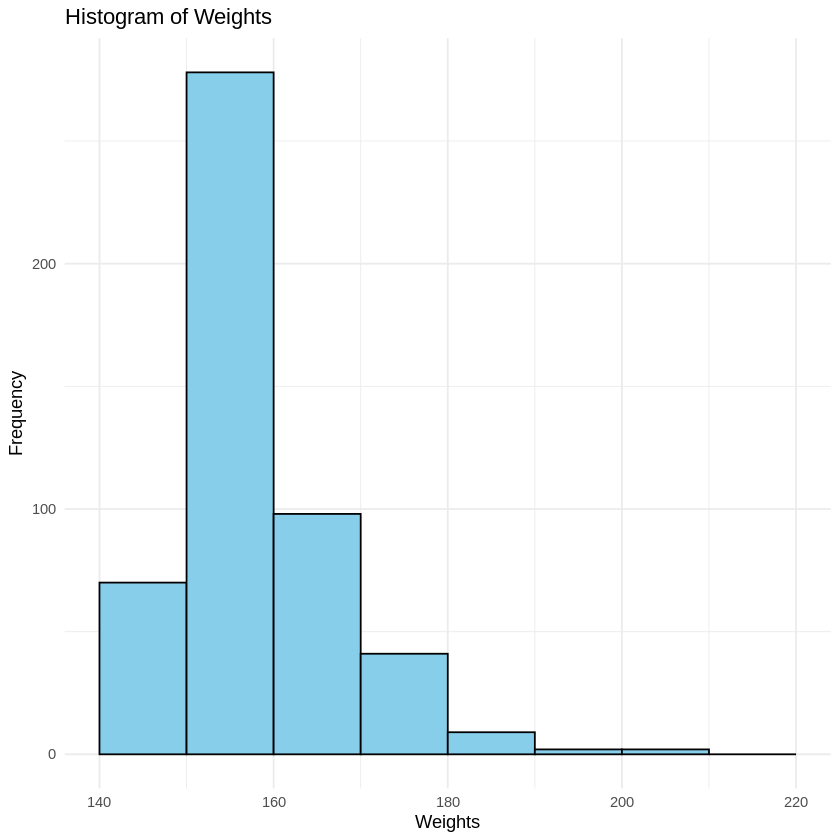

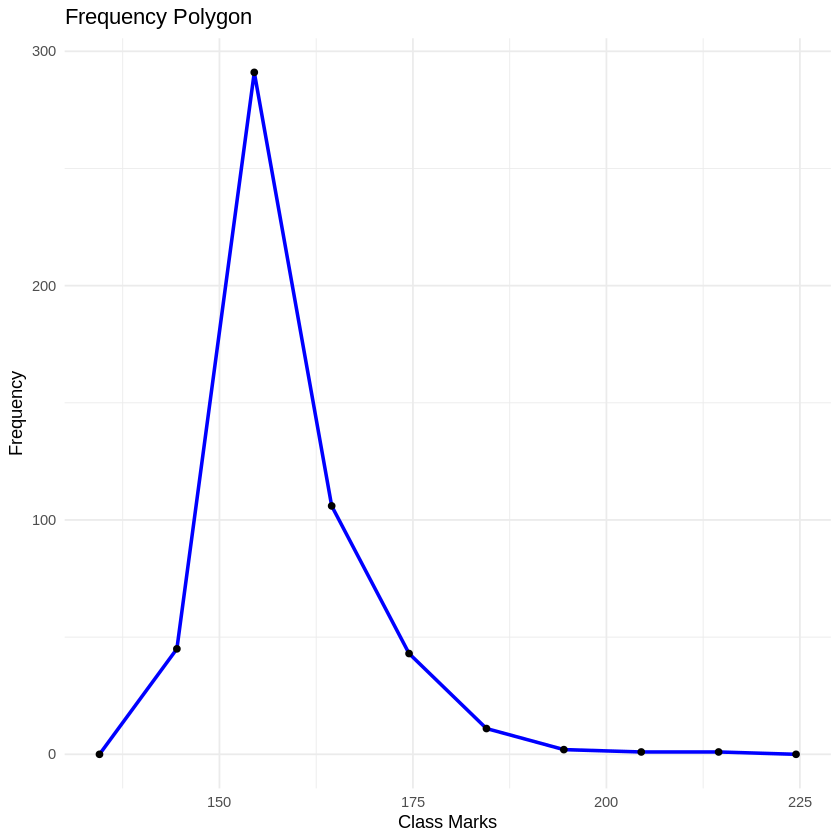

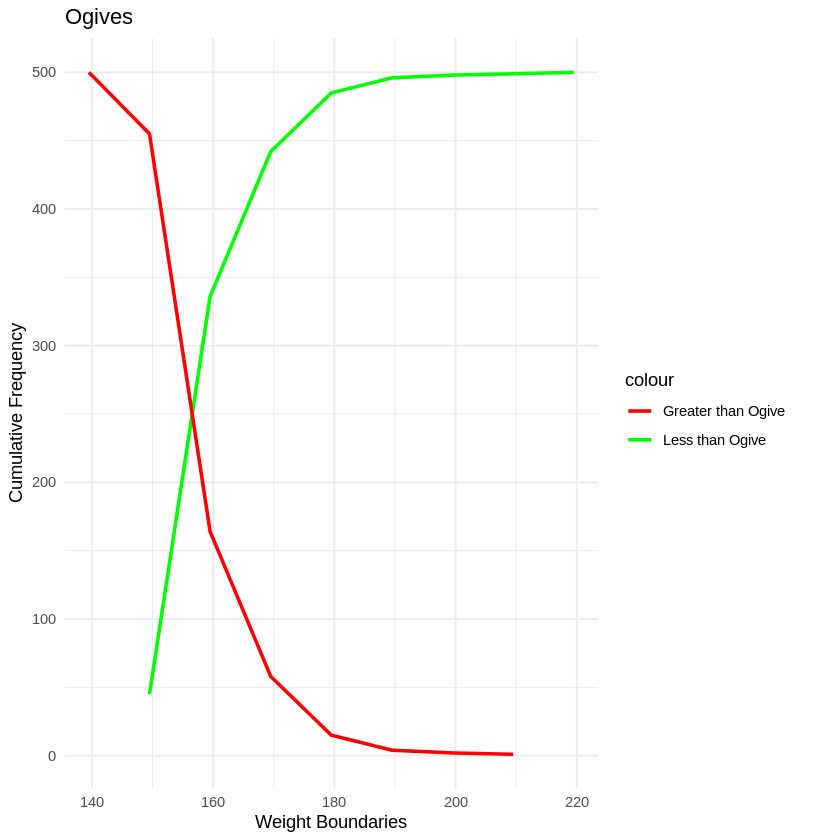

In [ ]:
if (!require("ggplot2")) install.packages("ggplot2")
library(ggplot2)

# Read the dataset
data <- read.csv("Dataset.csv")
weights <- data[[1]]

breaks <- seq(140, 220, by = 10)
labels <- paste(breaks[-length(breaks)], breaks[-1] - 1, sep = "-")

# Frequency Distribution Table
freq_counts <- table(cut(weights, breaks = breaks, right = FALSE, labels = labels))
fdt <- data.frame(
  Class_Interval = names(freq_counts),
  Frequency = as.vector(freq_counts)
)

fdt$Class_Marks <- (breaks[-length(breaks)] + (breaks[-1] - 1)) / 2
fdt$Lower_Bound <- breaks[-length(breaks)] - 0.5
fdt$Upper_Bound <- (breaks[-1] - 1) + 0.5
fdt$Cum_Freq_Less <- cumsum(fdt$Frequency)
fdt$Cum_Freq_Greater <- rev(cumsum(rev(fdt$Frequency)))

print(fdt)

# Histogram
ggplot(data.frame(weights), aes(x = weights)) +
  geom_histogram(breaks = breaks, fill = "skyblue", color = "black") +
  labs(title = "Histogram of Weights", x = "Weights", y = "Frequency") +
  theme_minimal()

# Frequency Polygon
poly_data <- data.frame(
  x = c(fdt$Class_Marks[1]-10, fdt$Class_Marks, fdt$Class_Marks[nrow(fdt)]+10),
  y = c(0, fdt$Frequency, 0)
)
ggplot(poly_data, aes(x = x, y = y)) +
  geom_line(color = "blue", size = 1) +
  geom_point() +
  labs(title = "Frequency Polygon", x = "Class Marks", y = "Frequency") +
  theme_minimal()

# Ogives
ggplot() +
  geom_line(aes(x = fdt$Upper_Bound, y = fdt$Cum_Freq_Less, color = "Less than Ogive"), size = 1) +
  geom_line(aes(x = fdt$Lower_Bound, y = fdt$Cum_Freq_Greater, color = "Greater than Ogive"), size = 1) +
  labs(title = "Ogives", x = "Weight Boundaries", y = "Cumulative Frequency") +
  scale_color_manual(values = c("Less than Ogive" = "green", "Greater than Ogive" = "red")) +
  theme_minimal()